In [1]:
import pandas as pd
import os

In [2]:
path = r"C:\Users\samarnat\Documents\Learning\Analytics\ml\ts\Forecasting+Resources+(ST+Academy)\Forecasting Resources (ST Academy)\Data + Code"

In [3]:
filename = "daily-total-female-births-CA.csv"

In [4]:
file = os.path.join(path, filename)

In [5]:
df = pd.read_csv(file, header = 0, parse_dates = [0])

In [6]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
datavizDf = df.copy()

In [9]:
datavizDf.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [10]:
datavizDf.index = datavizDf["date"]

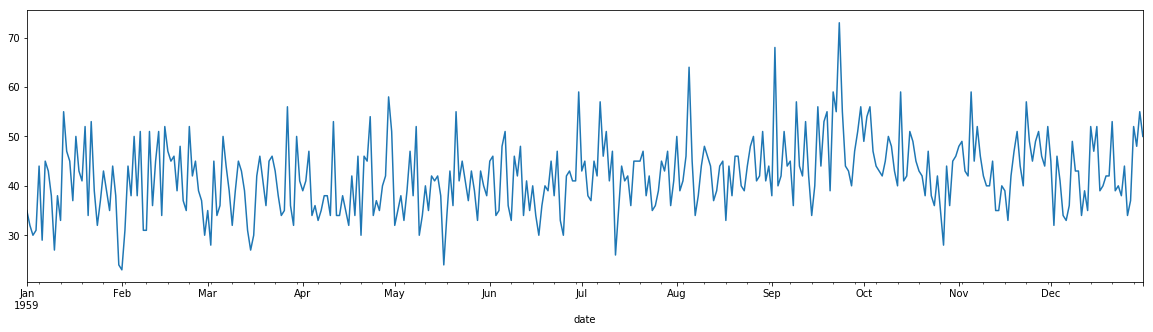

In [11]:
datavizDf["births"].plot(figsize = (20, 5))

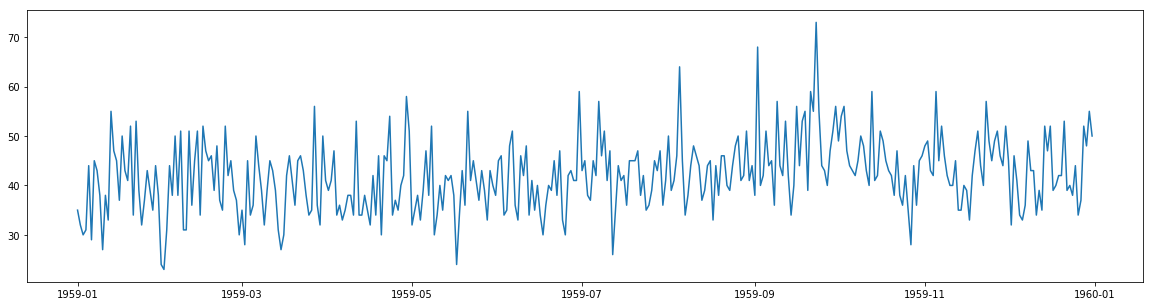

In [12]:
plt.figure(figsize = (20, 5))
plt.plot(datavizDf["births"])
plt.show()

In [13]:
datavizJanDf = datavizDf[(datavizDf["date"] >= "1959-01-01") & (datavizDf["date"] <= "1959-01-31")]

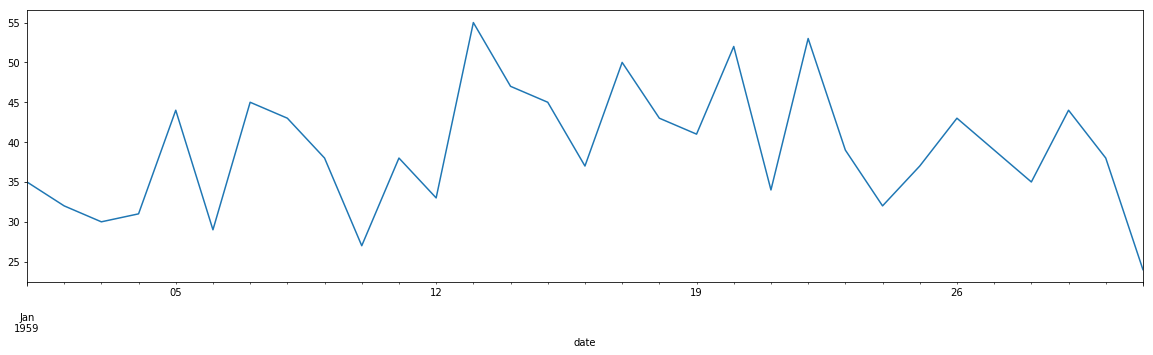

In [14]:
datavizJanDf["births"].plot(figsize = (20, 5))

In [15]:
datavizDf.reset_index(drop=True, inplace=True)

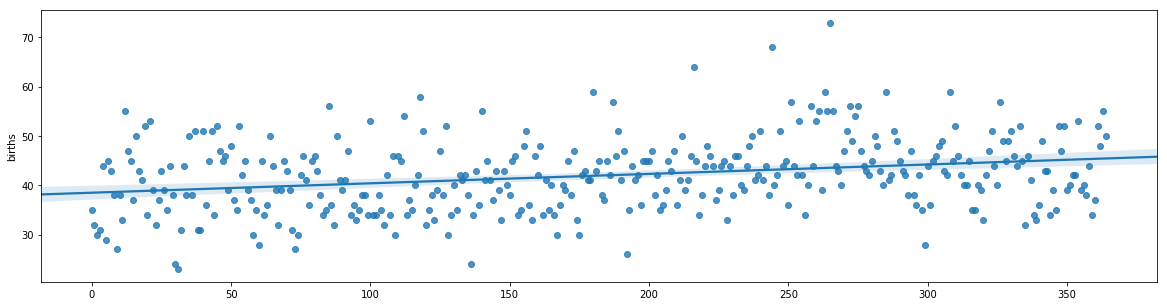

In [16]:
import seaborn as sns
plt.figure(figsize=(20, 5))
sns.regplot(x = datavizDf.index.values, y = datavizDf["births"], )

In [17]:
import numpy as np

In [18]:
z = np.polyfit(datavizDf.index.values, datavizDf["births"], deg = 1)
z

array([1.90845534e-02, 3.85074332e+01])

In [19]:
p = np.poly1d(z)
p

poly1d([1.90845534e-02, 3.85074332e+01])

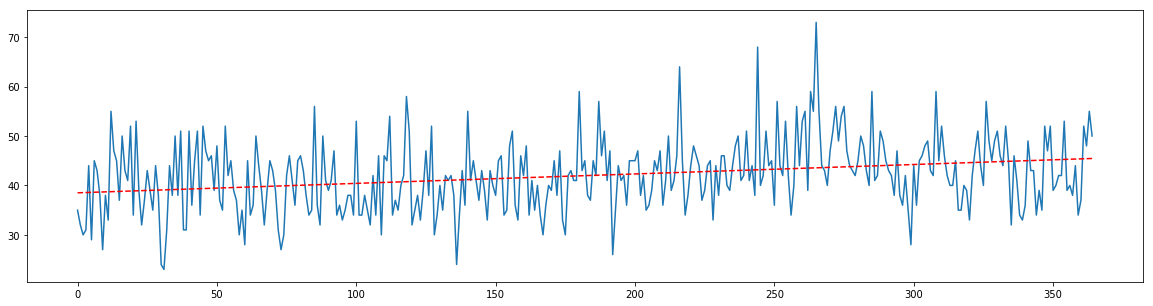

In [20]:
plt.figure(figsize = (20, 5))
plt.plot(datavizDf.index.values, datavizDf["births"])
plt.plot(datavizDf.index.values, p(datavizDf.index.values), "r--")

# Lags and Correlations

In [21]:
file2 = "us-airlines-monthly-aircraft-miles-flown.csv"

In [22]:
file2 = os.path.join(path, file2)

In [23]:
df2 = pd.read_csv(file2, header = 0, parse_dates = [0])

In [24]:
df2.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


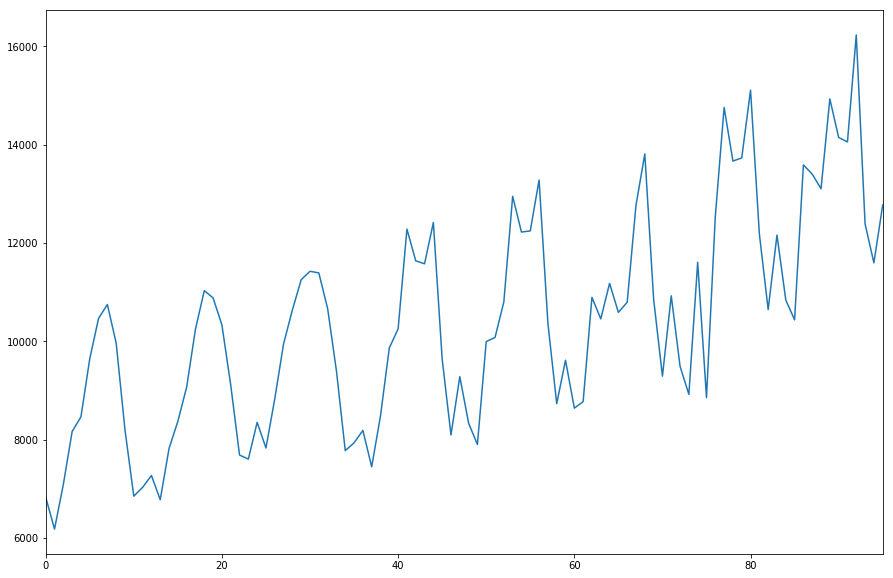

In [25]:
df2["MilesMM"].plot(figsize = (15, 10))

In [26]:
df2["Year"] = df2["Month"].dt.year

In [27]:
df2.head()

,Month,MilesMM,Year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [31]:
yearlyMeanDf = df2.groupby("Year")["MilesMM"].mean()

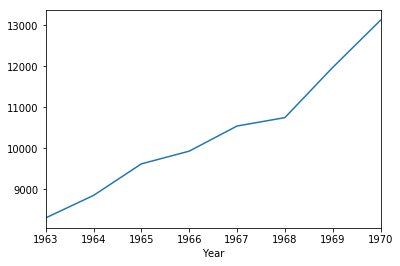

In [32]:
yearlyMeanDf.plot()

In [33]:
df2["lag1"] = df2["MilesMM"].shift(1)

In [34]:
df2.head()

,Month,MilesMM,Year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


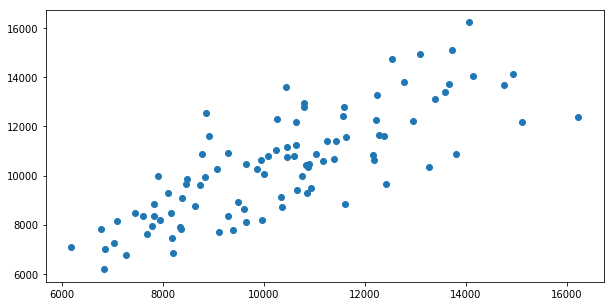

In [37]:
plt.figure(figsize = (10, 5))
plt.scatter(x = df2["lag1"], y = df2["MilesMM"])

In [38]:
from pandas.plotting import lag_plot, autocorrelation_plot

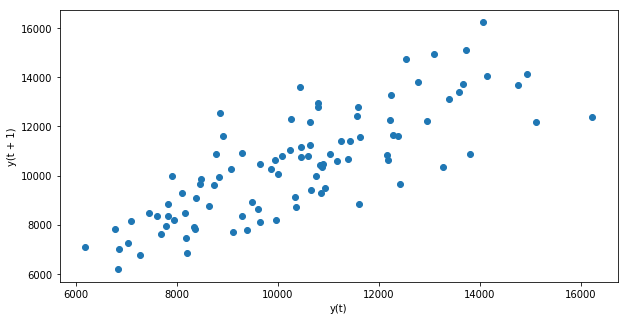

In [53]:
plt.figure(figsize = (10, 5))
lag_plot(df2["MilesMM"], lag = 1)

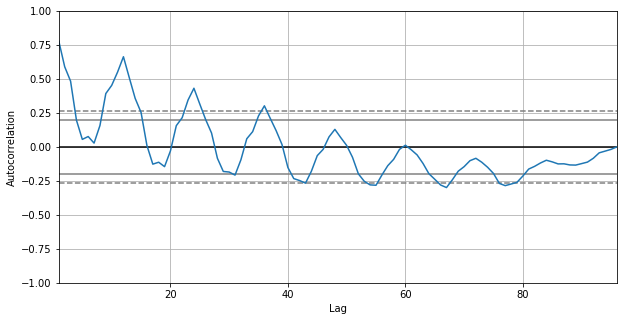

In [43]:
plt.figure(figsize = (10, 5))
autocorrelation_plot(df2["MilesMM"])